In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [24]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
product = pd.read_csv("/Users/changyin/Desktop/UCL DISSERTATION/GW  data/ananke/ananke_public_products.csv")

In [4]:
product = product.iloc[:,:6]

In [5]:
product.shape

(528, 6)

In [6]:
product.isnull().sum()

product_id            0
merchant_id           0
product_name         93
product_details     133
product_category    104
product_brand       141
dtype: int64

In [7]:
product[pd.isnull(product).any(axis=1)]

,product_id,merchant_id,product_name,product_details,product_category,product_brand
2,29605c38-e695-4752-8a65-8d1f831f9308,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,NaN,NaN,NaN,NaN
3,a4fb126d-8649-4131-8218-c164ee707dbe,035ab3e1-ec94-40a6-8603-9df2abd8a75d,NaN,NaN,NaN,NaN
4,362c5608-90ed-42a4-8008-7a37b623a859,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,NaN,NaN,NaN,NaN
5,e33d192f-51ae-40ce-b3dc-552cb084908c,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,demo product,NaN,Health & Beauty,Stella McCartney
7,7304d654-44b9-40e4-a584-188e7df7a5da,d601de5f-546e-416a-8ef6-6c650ed13e90,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
406,31b321ff-0463-4983-ac4b-299b5849de10,7856e6b5-49e1-4cfb-9bc6-3341244e41e4,Chaga Extract by ENRICHD,NaN,Plant-based Nutrition,NaN
407,95e25bb4-34d0-458a-a5e7-fc791052c6a1,7856e6b5-49e1-4cfb-9bc6-3341244e41e4,EPIC Vanilla Protein Powder by ENRICHD,NaN,Plant-based Nutrition,NaN
408,8e4f52c3-bb01-4a59-a8ad-a99db86ad8fc,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,NaN,NaN,NaN,NaN
452,49c0ca46-6b33-4a36-81f9-821017765438,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,Foaming trigger head,NaN,Health & Beauty,Delphis Eco UK


In [8]:
for i in range(len(product)):
    if product['product_details'][i] is None and product['product_name'][i] is not None :
        product['product_details'][i] = product['product_name'][i]

In [9]:
product['product_details'].isnull().sum()

133

In [10]:
product = product.dropna().reset_index()

In [11]:
product.drop_duplicates(subset ="product_name",
                     keep = False, inplace = True)

In [12]:
product = product.reset_index()

In [13]:
product[:10]

,level_0,index,product_id,merchant_id,product_name,product_details,product_category,product_brand
0,1,1,37c9ebce-9f8a-46f2-b13f-5fcb2fde0c5c,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,wdqw,sdsadfsfsdf,Ethical Fashion,Ethcs
1,2,6,e4c13d57-3ff6-48ae-8e76-e93eee14b350,d601de5f-546e-416a-8ef6-6c650ed13e90,Reishi Spore Powder (Cracked Cell from Wood-Gr...,&gt;&gt; ENRICH YOUR SLEEP &lt;&lt;\nPEOPLE DR...,Apparel,ENRICHD SUPERFOODS
2,3,8,c3bb7ae7-00f9-4ce0-bab0-90435509f6c6,d601de5f-546e-416a-8ef6-6c650ed13e90,Samurai Matcha Powder Tea Ceremonial Grade (Or...,ENRICHD Samurai Matcha is Ceremonial Grade and...,Apparel,ENRICHD SUPERFOODS
3,6,20,6081073d-57a7-4f53-b066-2bfbfebfa7d5,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,New Product Demo,fdsgsgds,Accessories,Stella McCartney
4,7,21,da95fc06-3d59-473b-9c70-a4fa5e4a6eef,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,Washroom Cleaner,Our EU Ecolabel* accredited Washroom Cleaner i...,Health & Beauty,Delphis Eco UK
5,9,23,16be2778-f8cf-452d-8e49-daab3a6fe332,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,Washroom Cleaner Refill Bottle 750ml **,Our ready labelled Washroom Cleaner refill bot...,Health & Beauty,Delphis Eco UK
6,10,24,e3de8f26-41d6-4e18-9edd-f2a6fad96692,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,Gamma Navy Bag,"Made of the finest quality cork fabric, this c...",Ethical Fashion,Stella McCartney
7,12,29,4367cdcb-37af-42b4-a8ae-6dbc9d02f303,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,Anti-Bacterial Foaming Soap,Technikraft code T1516\nOur anti-microbial and...,Health & Beauty,Delphis Eco UK
8,13,30,bdd8d7ec-48e9-416e-9d96-3e3f761df363,d601de5f-546e-416a-8ef6-6c650ed13e90,Joyful Jasmine Green Tea (Organic),"A delightful Jasmine Green Tea, quite a lively...",Plant-based Nutrition,ENRICHD SUPERFOODS
9,14,31,b6ccc620-a6de-40ec-9f11-b48e3eb169d1,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,Anti-Bacterial Hand Soap (RTU),Our anti-microbial hand soap has been speciall...,Health & Beauty,Delphis Eco UK


In [14]:
len(product)

328

In [15]:
def preprocess(Text):
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(;;)', '')
    Text = Text.str.replace('(\n)', '')
    Text = Text.str.replace('(\xa0)', ' ')   
    return Text

In [16]:
product['product_details'] = preprocess(product['product_details'])

In [17]:
from textblob import TextBlob

In [18]:
product['polarity'] = product['product_details'].map(lambda text: TextBlob(text).sentiment.polarity)
product['detail_len'] = product['product_details'].astype(str).apply(len)
product['word_count'] = product['product_details'].apply(lambda x: len(str(x).split()))

In [19]:
product[:10]

,level_0,index,product_id,merchant_id,product_name,product_details,product_category,product_brand,polarity,detail_len,word_count
0,1,1,37c9ebce-9f8a-46f2-b13f-5fcb2fde0c5c,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,wdqw,sdsadfsfsdf,Ethical Fashion,Ethcs,0.000000,11,1
1,2,6,e4c13d57-3ff6-48ae-8e76-e93eee14b350,d601de5f-546e-416a-8ef6-6c650ed13e90,Reishi Spore Powder (Cracked Cell from Wood-Gr...,ENRICH YOUR SLEEP PEOPLE DRINK REISHI SPORES ...,Apparel,ENRICHD SUPERFOODS,0.259077,3055,410
2,3,8,c3bb7ae7-00f9-4ce0-bab0-90435509f6c6,d601de5f-546e-416a-8ef6-6c650ed13e90,Samurai Matcha Powder Tea Ceremonial Grade (Or...,ENRICHD Samurai Matcha is Ceremonial Grade and...,Apparel,ENRICHD SUPERFOODS,0.224883,1332,197
3,6,20,6081073d-57a7-4f53-b066-2bfbfebfa7d5,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,New Product Demo,fdsgsgds,Accessories,Stella McCartney,0.000000,8,1
4,7,21,da95fc06-3d59-473b-9c70-a4fa5e4a6eef,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,Washroom Cleaner,Our EU Ecolabel* accredited Washroom Cleaner i...,Health & Beauty,Delphis Eco UK,0.385714,594,85
5,9,23,16be2778-f8cf-452d-8e49-daab3a6fe332,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,Washroom Cleaner Refill Bottle 750ml **,Our ready labelled Washroom Cleaner refill bot...,Health & Beauty,Delphis Eco UK,0.262500,245,40
6,10,24,e3de8f26-41d6-4e18-9edd-f2a6fad96692,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,Gamma Navy Bag,"Made of the finest quality cork fabric, this c...",Ethical Fashion,Stella McCartney,0.146875,894,149
7,12,29,4367cdcb-37af-42b4-a8ae-6dbc9d02f303,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,Anti-Bacterial Foaming Soap,Technikraft code T1516Our anti-microbial and a...,Health & Beauty,Delphis Eco UK,0.252922,682,101
8,13,30,bdd8d7ec-48e9-416e-9d96-3e3f761df363,d601de5f-546e-416a-8ef6-6c650ed13e90,Joyful Jasmine Green Tea (Organic),"A delightful Jasmine Green Tea, quite a lively...",Plant-based Nutrition,ENRICHD SUPERFOODS,0.207891,503,86
9,14,31,b6ccc620-a6de-40ec-9f11-b48e3eb169d1,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,Anti-Bacterial Hand Soap (RTU),Our anti-microbial hand soap has been speciall...,Health & Beauty,Delphis Eco UK,0.275649,1062,142


In [25]:
product['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [46]:
product['detail_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='character count',
    linecolor='black',
    yTitle='count',
    title='Character Count Distribution')

In [27]:
product['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Product Detail Word Count Distribution')

In [26]:
product.groupby('product_category').count()['product_id'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Number of Products in each Categories', xTitle='Category')

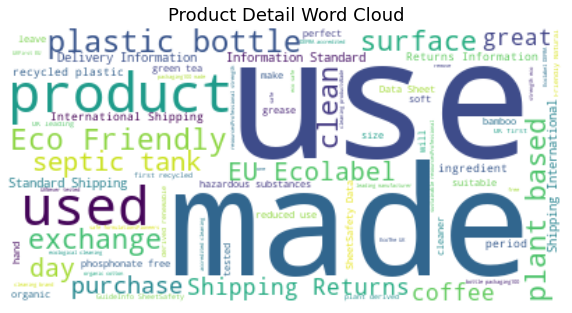

In [52]:
# Generate word cloud for stree and non-stress posts

product_sample=" ".join(i for i in product['product_details'])

# Generate the image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=100).generate(product_sample)

# visualize the image
fig=plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Product Detail Word Cloud', size=18)
plt.show()

print("\n")


In [57]:
product[product_detail=='Health & Beauty']

Series([], Name: product_details, dtype: object)

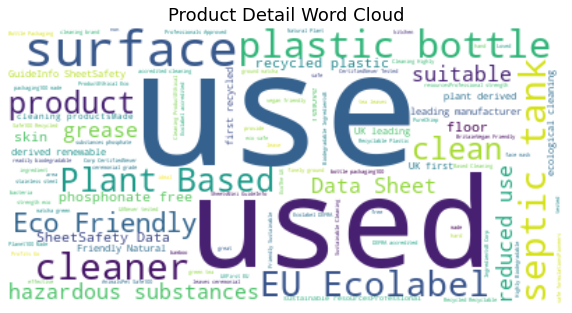

In [59]:
# Generate word cloud for stree and non-stress posts
product_sample=" ".join(i for i in product[product['product_category']=='Health & Beauty'].loc[:,'product_details'])

# Generate the image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=100).generate(product_sample)

# visualize the image
fig=plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Product Detail Word Cloud', size=18)
plt.show()

print("\n")



In [39]:
#importing Pandas 
import pandas as pd
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [13]:
product_id_name= product[['product_id','product_name']]

In [14]:
product_id_name.iloc[0]

product_id      37c9ebce-9f8a-46f2-b13f-5fcb2fde0c5c
product_name                                    wdqw
Name: 0, dtype: object

In [15]:
product_id_name[product_id_name['product_id']=="9abf4537-3d98-4f57-9aa4-aa65c26169a8"].index.values

array([], dtype=int64)

In [16]:
index_match('64c7e6c5-379d-479a-9885-7c4eb98e8290')

NameError: name 'index_match' is not defined

In [134]:
product["product_category"].value_counts()

Health & Beauty          157
Ethical Fashion          104
Accessories               26
Plant-based Nutrition     18
Apparel                   16
Organics                   7
Name: product_category, dtype: int64

In [135]:
from sklearn.preprocessing import OneHotEncoder

In [136]:
encoder = OneHotEncoder()

In [137]:
housing_cat_1hot = encoder.fit_transform(product[["product_category"]])
housing_cat_1hot

<328x6 sparse matrix of type '<class 'numpy.float64'>'
	with 328 stored elements in Compressed Sparse Row format>

In [138]:
a = housing_cat_1hot.toarray()

In [139]:
type_matrix = np.matmul(a,np.matrix.transpose(a))

In [140]:
type_matrix.shape

(328, 328)

In [132]:
def index_match(product_id):
    return product_id_name[product_id_name['product_id']==product_id].index.values[0]

In [174]:
def similarity_score(product_id,topn):
    index = index_match(product_id)
    encoder1 = OneHotEncoder()
    encoder2 = OneHotEncoder()
    cat_1 = product[["product_category"]]
    cat_2 = product[["product_brand"]]
    cat_1hot = encoder.fit_transform(cat_1).toarray()
    cat_2hot = encoder.fit_transform(cat_2).toarray()
    type_matrix1 = np.matmul(cat_1hot,np.matrix.transpose(cat_1hot))
    type_matrix2 = np.matmul(cat_2hot,np.matrix.transpose(cat_2hot))
    score = type_matrix1*2+type_matrix2*1
    score_dict = dict(zip(np.arange(0,len(score[0]),1),list(score[index])))
    sorted_dict = dict(sorted(score_dict.items(), key=lambda item: item[1],reverse=True)[:topn])
    result_index = list(sorted_dict.keys())  
    return list(product_id_name.iloc[x] for x in result_index)

In [175]:
product_id_name.iloc[index_match('64c7e6c5-379d-479a-9885-7c4eb98e8290')]

product_id      64c7e6c5-379d-479a-9885-7c4eb98e8290
product_name                         Xfactor Cleaner
Name: 327, dtype: object

In [176]:
similarity_score('64c7e6c5-379d-479a-9885-7c4eb98e8290',5)

[product_id      da95fc06-3d59-473b-9c70-a4fa5e4a6eef
 product_name                        Washroom Cleaner
 Name: 4, dtype: object,
 product_id         16be2778-f8cf-452d-8e49-daab3a6fe332
 product_name    Washroom Cleaner Refill Bottle 750ml **
 Name: 5, dtype: object,
 product_id      4367cdcb-37af-42b4-a8ae-6dbc9d02f303
 product_name             Anti-Bacterial Foaming Soap
 Name: 7, dtype: object,
 product_id      b6ccc620-a6de-40ec-9f11-b48e3eb169d1
 product_name          Anti-Bacterial Hand Soap (RTU)
 Name: 9, dtype: object,
 product_id      18ce5967-791f-4bbd-a7ce-d1a87213eefb
 product_name     Anti-Bacterial Hand Soap Wash 350ml
 Name: 14, dtype: object]

In [148]:
product.iloc[327]

level_0                                                           361
index                                                             527
product_id                       64c7e6c5-379d-479a-9885-7c4eb98e8290
merchant_id                      9e2c4da3-6f0b-47d6-8809-46cfde958aa4
product_name                                          Xfactor Cleaner
product_details     \n Our X Factor is a highly effective spot cle...
product_category                                      Health & Beauty
product_brand                                          Delphis Eco UK
Name: 327, dtype: object

In [149]:
product.iloc[0]

level_0                                                1
index                                                  1
product_id          37c9ebce-9f8a-46f2-b13f-5fcb2fde0c5c
merchant_id         9e2c4da3-6f0b-47d6-8809-46cfde958aa4
product_name                                        wdqw
product_details                              sdsadfsfsdf
product_category                         Ethical Fashion
product_brand                                      Ethcs
Name: 0, dtype: object

In [178]:
product_descp = product[['product_id','product_details']]

In [179]:
product_descp

,product_id,product_details
0,37c9ebce-9f8a-46f2-b13f-5fcb2fde0c5c,sdsadfsfsdf
1,e4c13d57-3ff6-48ae-8e76-e93eee14b350,&gt;&gt; ENRICH YOUR SLEEP &lt;&lt;\nPEOPLE DR...
2,c3bb7ae7-00f9-4ce0-bab0-90435509f6c6,ENRICHD Samurai Matcha is Ceremonial Grade and...
3,6081073d-57a7-4f53-b066-2bfbfebfa7d5,fdsgsgds
4,da95fc06-3d59-473b-9c70-a4fa5e4a6eef,Our EU Ecolabel* accredited Washroom Cleaner i...
...,...,...
323,92ef5c01-84f7-4e50-a2e2-638b65687528,Love your smile and the planet with our activa...
324,43baa88b-bff5-4b24-8732-30f4e037981b,PRODUCT DETAILS\nBaby Long Sleeve Top - Protec...
325,ccaa987e-7bf6-456d-9125-63907641c19f,PRODUCT DETAILSWARM WEATHER WONDERS.Show of...
326,9da38457-02d8-41c8-9919-a51f6e185c9e,\n\n\n\n\nOur Xfactor Stain Remover spray is a...


In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [191]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descp["product_details"])
X1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [198]:
x2 = X1.toarray()

In [200]:
x2[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [203]:
len(np.sort(x2[0]))

4165

In [204]:
from nltk import tokenize
from operator import itemgetter
import math

In [207]:
doc = product_descp.iloc[1,1]

In [28]:
reviews = pd.read_csv("/Users/changyin/Desktop/UCL DISSERTATION/GW  data/ananke/ananke_public_product_reviews.csv")

In [29]:
reviews[:10]

,review_id,product_id,user_id,rating,review_title,review_detail,time,user_name
0,9be44360-9cea-47f3-b4e8-7b7c40d23835,529a312a-23ff-4454-8c8c-1349bd8f364f,8deb147f-fff3-4fa5-9c8c-f659b0d072cf,4,Amazing product,Super soft.,28:59.6,Rudi Luis
1,2e01123f-6b86-4de1-aac6-cae336b31942,e3536d24-a23f-410b-b443-51f3231889b7,0a98e375-6dd0-4fa7-920e-c43e10ca7dd4,5,great product!,Thank you!,08:46.0,Bashir Khairy
2,2e197cfd-20a5-4784-adc7-4b44d8d2734d,e3536d24-a23f-410b-b443-51f3231889b7,59c56c4a-0895-411c-9382-306da6deb83a,4,Love these shoes!,Fantastic.,59:44.8,Charlie Freeman
3,f6584604-4d41-434d-a91c-05585a6da910,08a5e75b-68ba-4d0a-b128-1cae859a69bc,59c56c4a-0895-411c-9382-306da6deb83a,5,Great product!,Love it.,02:48.8,Charlie Freeman
4,7f49ebfe-d3c5-4a1d-a27d-68a5fb33bcef,593736b2-d670-4457-ac57-b7c3d4083def,72e3fdcd-5420-4522-9556-d38a35facaa6,4,jg,Kuhl kJ him,11:28.0,Rudi Luis
5,c8c0ce15-a1ab-471f-831b-38060eaff165,b3508141-fdec-4f13-bedb-929ad1990f79,0a98e375-6dd0-4fa7-920e-c43e10ca7dd4,5,great product,I like this a lot! Very good product,24:28.5,Bashir Khairy
6,7df9bafa-a580-4410-8428-aaceabbc4a3f,68bc0384-154d-43ab-a585-52bda8d71ef5,0a98e375-6dd0-4fa7-920e-c43e10ca7dd4,5,loving this!,Love the choice of straps. Recommended to all ...,01:35.0,Bashir Khairy
7,3e876a7e-4f72-4f47-bc1e-47407a1ec8fb,529a312a-23ff-4454-8c8c-1349bd8f364f,0a98e375-6dd0-4fa7-920e-c43e10ca7dd4,3,nice but pricey,Pricey,17:20.9,Bashir Khairy
8,42012bc1-0b65-4cb4-acdc-8db7756d0f23,84075adc-b315-4498-83eb-f0ba55a1015c,0a98e375-6dd0-4fa7-920e-c43e10ca7dd4,5,great t-shirt,Love it,10:09.4,Bashir Khairy
9,0fce78ad-13bc-4e99-b2b2-52e46aab71f3,c9cac1d8-a80a-49fa-a3f5-a289f892b122,0a98e375-6dd0-4fa7-920e-c43e10ca7dd4,4,great!,Nice product.,28:30.8,Bashir Khairy


In [30]:
reviews['rating'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [57]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
reviews['review_detail'] = preprocess(reviews['review_detail'])

reviews['polarity'] = reviews['review_detail'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['review_detail'].astype(str).apply(len)
reviews['word_count'] = reviews['review_detail'].apply(lambda x: len(str(x).split()))

In [58]:
reviews['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [59]:
reviews['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [74]:
reviews.groupby(['user_id']).count()

,review_id,product_id,rating,review_title,review_detail,time,user_name,polarity,review_len,word_count
user_id,,,,,,,,,,
0a98e375-6dd0-4fa7-920e-c43e10ca7dd4,21,21,21,21,21,21,21,21,21,21
19ac0608-13bc-43fd-a03d-9cb423423f5e,1,1,1,1,1,1,1,1,1,1
257c91c7-2279-4fe1-8ca4-7f66b99826d5,2,2,2,2,2,2,2,2,2,2
265b9e20-4ab7-4c7d-836e-2d6175565002,1,1,1,1,1,1,1,1,1,1
4f9e149e-2ea9-4e8d-b8ad-3787980d2790,1,1,1,1,1,1,1,1,1,1
59c56c4a-0895-411c-9382-306da6deb83a,2,2,2,2,2,2,2,2,2,2
70f05d0a-b655-4d2c-8f7b-096cec3fd2b2,1,1,1,1,1,1,1,1,1,1
72e3fdcd-5420-4522-9556-d38a35facaa6,4,4,4,4,4,4,4,4,4,4
8deb147f-fff3-4fa5-9c8c-f659b0d072cf,1,1,1,1,1,1,1,1,1,1


In [75]:
ratings_utility_matrix = reviews.pivot_table(values='rating', index='user_id', columns='product_id', fill_value=0)
#ratings_utility_matrix.head()

In [77]:
ratings_utility_matrix.shape

(10, 32)

In [80]:
X = ratings_utility_matrix.T
X.head()

user_id,0a98e375-6dd0-4fa7-920e-c43e10ca7dd4,19ac0608-13bc-43fd-a03d-9cb423423f5e,257c91c7-2279-4fe1-8ca4-7f66b99826d5,265b9e20-4ab7-4c7d-836e-2d6175565002,4f9e149e-2ea9-4e8d-b8ad-3787980d2790,59c56c4a-0895-411c-9382-306da6deb83a,70f05d0a-b655-4d2c-8f7b-096cec3fd2b2,72e3fdcd-5420-4522-9556-d38a35facaa6,8deb147f-fff3-4fa5-9c8c-f659b0d072cf,90c362b9-178b-46e3-bd20-930f0b463ee4
product_id,,,,,,,,,,
046c6fd4-fb76-40dd-8f80-7963ab983542,0,0,4,0,0,0,0,0,0,0
08a5e75b-68ba-4d0a-b128-1cae859a69bc,0,0,0,0,0,5,0,0,0,0
10b462c4-f456-47da-b70e-e3347697e53c,0,0,0,0,0,0,0,5,0,0
113c4f0b-fb59-4b50-8aa2-7e2fe6810ba2,0,0,0,0,5,0,0,0,0,0
146da440-fe76-4022-9090-f4bfe485ef28,4,0,0,0,0,0,0,0,0,0


In [82]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD()
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(32, 2)

In [83]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

/Users/changyin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/Users/changyin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



(32, 32)

In [87]:
correlation_matrix[0]

array([ 1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1., nan, -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

In [37]:
shipment = pd.read_csv("/Users/changyin/Desktop/UCL DISSERTATION/GW  data/ananke/ananke_public_product_shipments.csv",header = None)

In [38]:
shipment[:10]

,0,1,2,3,4,5,6,7,8,9
0,7e0796a7-e5f0-44b6-af39-ce48decfd01c,ca05fe45-86dd-4012-a871-e660827613ed,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,Get it within 4 - 6 working days,144,0,GBP,0.0,NaN,NaN
1,9796e426-e991-4ec2-a63e-137ab793f077,510f5ff0-0ed4-4905-93ff-cd1a781e3730,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,express_delivery,0,399,GBP,0.0,0.0,Express Delivery
2,d920bc1f-4bc3-4fef-8941-62b87a05156b,fdddb200-c979-4e14-9205-befba66157f2,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,standard_delivery,0,295,GBP,0.0,10000.0,Standard Delivery
3,4f965b65-97f7-438e-a961-89d894333296,75706044-59ff-4c2c-b6fb-36aadd14551a,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,standard_delivery,0,0,GBP,0.0,0.0,Standard Delivery
4,ff219b27-32d7-43bb-aa7f-13dab1093a90,b83a1e47-3a4a-439e-a952-acee50958435,fb24ca65-cb4a-40bf-b1c4-08408c737df7,3.99,0,0,GBP,NaN,100.0,NaN
5,0924984c-3ab2-4665-8355-a9070d393f5f,790f6835-8c4b-476f-96aa-aa3876ef1a58,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,next_day_delivery,0,300,GBP,0.0,0.0,Next Day Delivery
6,d7bc9743-f3c2-46e3-88c6-65ae0bd182dd,c0b1072e-46a1-4109-bf6b-692c79998aa6,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,international_delivery,0,0,GBP,0.0,0.0,International Delivery
7,91c61f46-ec5b-4595-b833-25a0a6d29021,08764c53-13d0-4a4a-a965-dcc9afc7c960,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,express_delivery,0,0,GBP,0.0,0.0,Express Delivery
8,6897a12c-e550-4ea0-8fca-23f4c83e41e9,95ea3a68-553c-4f73-a0b5-b2641a54a30f,589b60ef-d3cd-4f9c-9db4-fa4475f3c0fe,2541,0,0,GBP,0.0,142.0,NaN
9,c12acb16-a5e8-435a-b4e4-0a9d639a62b3,9f2ec7a2-d01b-41d3-8939-5f398fccca73,2d5c0f2c-f4d0-4ef1-bc73-920b075a4379,international_shipping,0,0,GBP,0.0,0.0,international_shipping


In [39]:
shipment.columns = ['shipment_id', 'product_id','merchant_id','method','delivery_time','amount','currency','vat','threshold','title']

In [40]:
shipment[:10]

,shipment_id,product_id,merchant_id,method,delivery_time,amount,currency,vat,threshold,title
0,7e0796a7-e5f0-44b6-af39-ce48decfd01c,ca05fe45-86dd-4012-a871-e660827613ed,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,Get it within 4 - 6 working days,144,0,GBP,0.0,NaN,NaN
1,9796e426-e991-4ec2-a63e-137ab793f077,510f5ff0-0ed4-4905-93ff-cd1a781e3730,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,express_delivery,0,399,GBP,0.0,0.0,Express Delivery
2,d920bc1f-4bc3-4fef-8941-62b87a05156b,fdddb200-c979-4e14-9205-befba66157f2,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,standard_delivery,0,295,GBP,0.0,10000.0,Standard Delivery
3,4f965b65-97f7-438e-a961-89d894333296,75706044-59ff-4c2c-b6fb-36aadd14551a,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,standard_delivery,0,0,GBP,0.0,0.0,Standard Delivery
4,ff219b27-32d7-43bb-aa7f-13dab1093a90,b83a1e47-3a4a-439e-a952-acee50958435,fb24ca65-cb4a-40bf-b1c4-08408c737df7,3.99,0,0,GBP,NaN,100.0,NaN
5,0924984c-3ab2-4665-8355-a9070d393f5f,790f6835-8c4b-476f-96aa-aa3876ef1a58,823f84e8-ba1a-4fc3-a9fe-36b92480c29f,next_day_delivery,0,300,GBP,0.0,0.0,Next Day Delivery
6,d7bc9743-f3c2-46e3-88c6-65ae0bd182dd,c0b1072e-46a1-4109-bf6b-692c79998aa6,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,international_delivery,0,0,GBP,0.0,0.0,International Delivery
7,91c61f46-ec5b-4595-b833-25a0a6d29021,08764c53-13d0-4a4a-a965-dcc9afc7c960,9e2c4da3-6f0b-47d6-8809-46cfde958aa4,express_delivery,0,0,GBP,0.0,0.0,Express Delivery
8,6897a12c-e550-4ea0-8fca-23f4c83e41e9,95ea3a68-553c-4f73-a0b5-b2641a54a30f,589b60ef-d3cd-4f9c-9db4-fa4475f3c0fe,2541,0,0,GBP,0.0,142.0,NaN
9,c12acb16-a5e8-435a-b4e4-0a9d639a62b3,9f2ec7a2-d01b-41d3-8939-5f398fccca73,2d5c0f2c-f4d0-4ef1-bc73-920b075a4379,international_shipping,0,0,GBP,0.0,0.0,international_shipping


In [41]:
payment = pd.read_csv("/Users/changyin/Desktop/UCL DISSERTATION/GW  data/hera/hera_public_payment_events.csv")

In [42]:
payment = payment.iloc[:,:15]

In [43]:
users = pd.read_csv("/Users/changyin/Desktop/UCL DISSERTATION/GW  data/nemesis/nemesis_public_wallet_accounts.csv",header = None)

In [44]:
users.columns = ['id','user_id','email']

In [45]:
shipment.shape

(1469, 10)

In [46]:
from random import choice

In [47]:
choice(users['user_id']) 

'n001usAhH6YtRMIH'

In [49]:
shipment['user_id'] = 0
for i in range(len(shipment)):
    shipment['user_id'][i] = choice(users['user_id'])

In [50]:
len(shipment)

1469

In [51]:
order = shipment[['product_id','user_id']]

In [54]:
import random

In [55]:
order['rating']= 0
for i in range(len(order)):
    order['rating'][i] = int(random.choices([1,2,3,4,5], weights=[1,1,2,13,17], k=1)[0])

In [56]:
order['rating'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [195]:
order

,product_id,user_id,rating
0,ca05fe45-86dd-4012-a871-e660827613ed,n001usquOGrf1VqE,5
1,510f5ff0-0ed4-4905-93ff-cd1a781e3730,n001usbvvQhRjaw0,4
2,fdddb200-c979-4e14-9205-befba66157f2,n001usquOGrf1VqE,5
3,75706044-59ff-4c2c-b6fb-36aadd14551a,n001bsDbMW0ozYNr,5
4,b83a1e47-3a4a-439e-a952-acee50958435,n001usquOGrf1VqE,5
...,...,...,...
1464,e30fcb7d-8e6d-468c-9ffd-a36a5ab0bff6,n001usquOGrf1VqE,5
1465,9af7d0c4-6ea0-4797-bd46-c81f872c0214,n001usQiBKHaJ0QE,2
1466,9af7d0c4-6ea0-4797-bd46-c81f872c0214,n001bsxP3lTwXYJT,5
1467,9af7d0c4-6ea0-4797-bd46-c81f872c0214,n001usAqSMerlnTX,4


In [198]:
ratings_utility_matrix = order.pivot_table(values='rating', index='user_id', columns='product_id', fill_value=0,aggfunc='first')
#ratings_utility_matrix.head()

In [199]:
ratings_utility_matrix.head()

product_id,004d7969-1daa-4a62-bd78-35b901e774b6,0155faa2-42b1-41c2-a152-5fe05b47e2b7,02045ebc-a983-490a-b3e6-4fe9411a517b,0258ccdf-8d46-4d37-8899-553cf72ca537,02e3bf8f-57cd-4416-97e9-1fe5b4eef872,046c6fd4-fb76-40dd-8f80-7963ab983542,05ee6b58-d6f1-45a0-b291-21ac84d9fd96,062906a4-ad88-4c45-b24b-e7fc2a1aa5c5,06348822-c6eb-493c-a2e4-797b725a6191,06a27229-3e19-47b1-b992-09fd36ad4b3b,...,faa6ee75-9115-4a4e-b1cc-b668ec4a3b50,fb0f33fb-189a-4d8d-9ebe-c179772cc852,fb793932-5bcf-4a17-93fc-6003879cd8da,fbb556c1-82d0-4408-a26e-68e71e74fe28,fbfdf872-8cd9-4767-9905-879512cc5845,fc8556db-e622-4917-93f6-b6c46f94b6fc,fd17b74e-50e3-4092-a4a8-d639b575e256,fdddb200-c979-4e14-9205-befba66157f2,ff16bf5b-028f-4182-867b-61770c38d5e5,ff23c00e-ea86-490d-9c76-bc0296a3adc8
user_id,,,,,,,,,,,,,,,,,,,,,
n001bs16rKgPIK0x,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n001bs2B8eoTOir7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n001bs4FNWxzi4Jw,0,0,0,5,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
n001bs4iKCeHbI5r,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n001bs79RrKfEoKT,0,0,2,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
X = ratings_utility_matrix.T
X.shape

(368, 52)

In [201]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(368, 10)

In [202]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(368, 368)

In [203]:
correlation_matrix

array([[ 1.        ,  0.23038299,  0.24495628, ...,  0.01210425,
         0.49370454, -0.17751381],
       [ 0.23038299,  1.        ,  0.27435512, ...,  0.00650586,
         0.3123038 , -0.11551628],
       [ 0.24495628,  0.27435512,  1.        , ...,  0.31415068,
        -0.05671838,  0.07693717],
       ...,
       [ 0.01210425,  0.00650586,  0.31415068, ...,  1.        ,
        -0.00167816,  0.53846884],
       [ 0.49370454,  0.3123038 , -0.05671838, ..., -0.00167816,
         1.        , -0.1422552 ],
       [-0.17751381, -0.11551628,  0.07693717, ...,  0.53846884,
        -0.1422552 ,  1.        ]])

In [204]:
correlation_product_ID = correlation_matrix[6]
correlation_product_ID.shape

(368,)

In [205]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
#Recommend.remove(6) 

Recommend[0:9]

['05ee6b58-d6f1-45a0-b291-21ac84d9fd96',
 '102aedf3-198e-461b-8234-c20c77dfbb40',
 '1fab50e1-1b23-43e5-b524-857494715fa8',
 '82bf9178-9471-4efe-a427-a4e6b3073548',
 '9e9d7d4b-c733-482e-b48e-df6aff0f6514',
 'ccbb53e1-77d1-443e-9a61-3feade8d2eb9',
 'd03172c2-44fe-48e9-b1a2-1af9ac316ea2',
 'dfb7755d-46b3-426c-ba96-3ea46379a8bb']

In [213]:
np.random.pareto(1,1)

array([1.43180405])